<a href="https://colab.research.google.com/github/ewakobrzynska/final/blob/master/FFNN_Zoo_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ZOO DATASET

Zanim zaczniemy używać scikit-learn, musimy zdecydować, jakie zadanie uczenia maszynowego chcemy za jego pomocą zrealizować. 

W tym eksperymencie użyjemy scikit-learn do klasyfikacji zwierząt z wykorzystaniem algorytmu **Sztucznej Sieci Neuronowej**. 
Wykorzystamy popularny przykładowy zestaw danych "zoo dataset" ([Link do zestawu danych tutaj](https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data)).


Istnieją różne gromady zwierząt (ssak, gady, ryby etc.). Naszym celem jest wyszkolenie systemu uczenia maszynowego, aby był w stanie wziąć nowy próbkę ze zbioru "zoo dataset" i przewidzieć do której grupy zwierząt ona należy.

![alt text](https://www.visitczechrepublic.com/cms/getmedia/9367B9FE-6BB2-4818-9A9D-2D06128C41C9/n-best-known-czech-zoos-6.jpg?width=1000&height=666&ext=.jpg)







## OPIS ZBIORU DANYCH
Ten zbiór danych ma:

* 101 przykładów,
* 7 klas: ssak, ptak, gad, ryba, płaz, owad, stawonogi (<1;7>),
* 16 cech: nazwa, włosy, pióra, jajka, mleko, airborne(zwierzęta, które mogą żyć w różnych środowiskach ląd/woda), wodny,  drapieżnik, zębaty, kręgosłup, zdolność do oddychania tlenem atmosferycznym,  jadowity, płetwy,  nogi (0,2,4,5,6,8), ogon, domowy, rozmiar (większe od kota albo mniejsze), typ <1;7>.



# IMPORTOWANIE I WSTĘPNA OBRÓBKA DANYCH
Tutaj importujemy wszystkie biblioteki, z których będziemy potrzebować dostępu do funkcji i ładujemy zbiór danych.
Został on poddany wstępnej obróbce - usunięto nazwy zwierząt przed podaniem jej sieci, ponieważ każda nazwa zwierzęcia jest różna, traktując ją jako ceche otrzymujemy 101 różnych cech, które nie są w żaden sposób pomocne do nauki sieci (można je traktować jako unikalne id danej próbki). Dodatkowo dodano etykiety kolejnych kolumn cech tj. hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type.

In [5]:
import keras #biblioteka dla sieci neuronowej
import pandas as pd #ładowanie danych w formie tabeli 
import seaborn as sns #wizualizacja 
import matplotlib.pyplot as plt #wizualizacja
import numpy as np #algebra liniowa
import pandas as pd #przetwarzanie danych, wejście/wyjście z pliku CSV (np. pd.read_csv)
from sklearn.preprocessing import normalize #biblioteka algroytmów uczenia maszynowego

#Załadowanie zbioru danych, który zawiera punkty danych (wystąpienie włosów, upierzenia etc.) i odpowiadające im etykiety (gromady zwierząt)
zoo_dataset=pd.read_csv("/content/zooName.txt")

#Debug - upewnienie się, że załadowano zestaw danych poprawnie. 
print(zoo_dataset)

     hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0       1         0     0     1         0        0         1        1   
1       1         0     0     1         0        0         0        1   
2       0         0     1     0         0        1         1        1   
3       1         0     0     1         0        0         1        1   
4       1         0     0     1         0        0         1        1   
..    ...       ...   ...   ...       ...      ...       ...      ...   
96      1         0     0     1         0        0         0        1   
97      1         0     1     0         1        0         0        0   
98      1         0     0     1         0        0         1        1   
99      0         0     1     0         0        0         0        0   
100     0         1     1     0         1        0         0        0   

     backbone  breathes  venomous  fins  legs  tail  domestic  catsize  type  
0           1         1         0     0     

# WIZUALIZACJA DANYCH

Aby uzyskać poczucie jak dane są rozłożone, wykreślono macierz w oparciu o różne cechy, takie jak wystąpienie włosów, upierzenia itp. 
Na podstawie macierzy możemy również zobaczyć, jakie są ogólne cechy każdej gromady zwierząt.
Pokazuje więc korelacje pomiędzy istniejącymi kolumnami danych. Im jaśniejszy albo ciemniejszy kolor tym bardziej skorelowane (współwystępują razem) są ze sobą dane.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


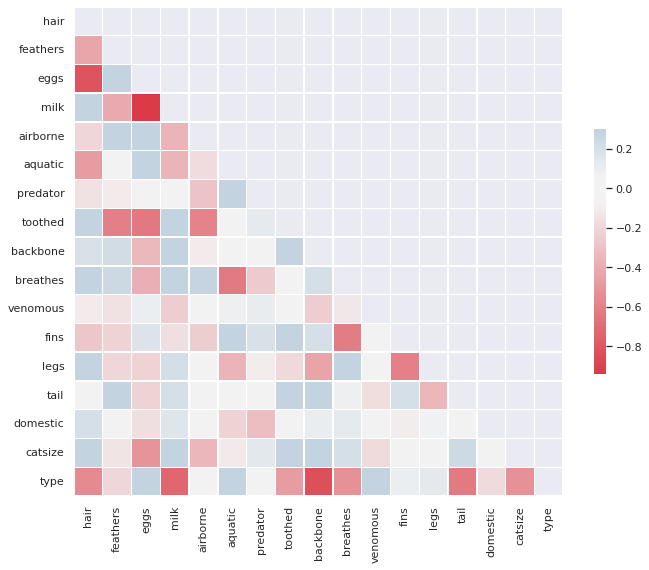

In [6]:
from IPython.display import display
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Obliczenie macierzy korelacji 
corr = zoo_dataset.corr()
#print(corr)
# Generowanie 'górnego' trójkata macierzy
mask = np.triu(np.ones_like(corr, dtype=np.bool))

#  Ustawienie figury matplotlibowej
f, ax = plt.subplots(figsize=(11, 9))

# Wygenerowanie niestandardowej rozbieżnej colormapy
cmap = sns.diverging_palette(10, 240, as_cmap=True, sep=20, n=11)

# Narysowanie mapy ciepła z maską i poprawnymi proporcjami
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# PODZIAŁ ZBIORÓW TRENINGOWYCH, TESTOWYCH I WALIDACYJNYCH

W uczeniu maszynowym należy użyć zbioru treningowego, aby nauczyć model, jak poprawnie klasyfikować przyszłe przykłady. Używamy również zestawu testowego, aby sprawdzić, jak jest dobry.

Zbiór treningowy to 60% danych, pozostałe 40% to zbiór tymczasowy, który zostanie podzielony po równo na zbiór testowy i walidacyjny. Dzięki random_state podział będzie zawsze taki sam.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from keras.utils import np_utils

# Rozbicie zbioru danych na przykłady (X) i ich etykiety (y)
X = zoo_dataset.iloc[:, 0:15].values
y = zoo_dataset.iloc[:, 16].values
X=normalize(X,axis=0)

# Podzielenie losowo zbiory danych X i y na zbiory treningowe i testowe
# 40% zbioru danych zostanie użyte do zbioru testowego
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
X_test, X_valid, y_test, y_valid = train_test_split(X_test,y_test,train_size=0.6)

y_train=np_utils.to_categorical(y_train-1,num_classes=7)
y_test=np_utils.to_categorical(y_test-1,num_classes=7)
y_valid=np_utils.to_categorical(y_valid-1,num_classes=7)



Nasz zestaw treningowy zawiera wszystkie poprawne cele (klasy) dla naszych przykładów zwierząt, wraz z 15 cechami każdego z nich. Wszystkie te informacje będą nam potrzebne do nauczenia naszego klasyfikatora, jak przewidywać gromadę na podstawie nowego zestawu 15 cech.


# STRUKTURA SIECI

Schemat sieci neuronowej:


![alt text](https://www.researchgate.net/profile/Facundo_Bre/publication/321259051/figure/fig1/AS:614329250496529@1523478915726/Artificial-neural-network-architecture-ANN-i-h-1-h-2-h-n-o.png)


Tutaj tworzymy Neural Newtork Framework, z iloma warstwami, funkcjami aktywacji, itd. Wybieramy większość parametrów, z wyjątkiem wag związanych z każdym węzłem. Te wagi są uczone przez sieć podczas późniejszego treningu.

In [8]:
import keras
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 


# Inicjalizacja ANN
model = Sequential()

# Dodanie warstwy wejściowej oraz pierwszej warstwy ukrytej
model.add(Dense(1000,input_dim=15,activation='relu'))
model.add(Dense(50,activation='relu'))

# Ochrona przed przeuczeniem
model.add(Dropout(0.2))

# Dodanie warstwy wyjściowej
model.add(Dense(7,activation='softmax'))

# Kompilacja ANN
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


# UCZENIE SIECI NEURONOWEJ

Proces treningu dopasowuje wagi węzłów do relacji pomiędzy cechami i etykietami zestawu treningowego.

Poniżej trenuje uzyskany wczesniej model na danych treningowych. Uzyskany wcześniej zbiór z danymi walidacyjnymi posłuży do oceny uzyskanych wyników po każdej epoce.

Liczba epok na początek zostaje ustawiona na 40, a liczba wierszy po których nastąpi aktualizacja wag to 15.
Parametr verbose pozwala obserwować błąd oraz dokładność obu zbiorów w każdej epoce.

Celem jest wybranie konfiguracji modelu, która zapewnij najniższe straty i najwyższą możliwą dokładność dla danego zbioru danych.

In [9]:
# Dopasowanie ANN do zbioru treningowego
history = model.fit(X_train,y_train,validation_data=(X_valid,y_valid), batch_size=35,epochs=20,verbose=1)


Epoch 1/20
2/2 [==============================] - 1s 153ms/step - loss: 1.9470 - accuracy: 0.2333 - val_loss: 1.9329 - val_accuracy: 0.3529
Epoch 2/20
2/2 [==============================] - 0s 19ms/step - loss: 1.9090 - accuracy: 0.6500 - val_loss: 1.9142 - val_accuracy: 0.3529
Epoch 3/20
2/2 [==============================] - 0s 18ms/step - loss: 1.8774 - accuracy: 0.7167 - val_loss: 1.8894 - val_accuracy: 0.4118
Epoch 4/20
2/2 [==============================] - 0s 17ms/step - loss: 1.8327 - accuracy: 0.7333 - val_loss: 1.8610 - val_accuracy: 0.4118
Epoch 5/20
2/2 [==============================] - 0s 17ms/step - loss: 1.7854 - accuracy: 0.7500 - val_loss: 1.8311 - val_accuracy: 0.4118
Epoch 6/20
2/2 [==============================] - 0s 18ms/step - loss: 1.7359 - accuracy: 0.7333 - val_loss: 1.7991 - val_accuracy: 0.4118
Epoch 7/20
2/2 [==============================] - 0s 17ms/step - loss: 1.6817 - accuracy: 0.6167 - val_loss: 1.7629 - val_accuracy: 0.4118
Epoch 8/20
2/2 [==========

Widać, że zarówno w zbiorze treningowym jak i walidacyjnym rozmiar błędu maleje wraz ze zwiększaniem się numeru epoki, a precyzja przewidywania rośnie.
Precyzja w końcowych epokach nadal rośnie, a nie utrzymuje się na stabilnym poziomie, jednak zdarza się jej uzyskać już maksymalna wartość precyzji (1.0).

## WYNIKI DLA ZBIORU TESTOWEGO
Użyjemy struktury sieci neuronowej, która została wytrenowana i przypisano jej wagi w węzłach na podstawie wzorców w danych treningowych, aby przewidzieć wyniki punktów danych w zbiorze testowym.

In [10]:
# Przewidywanie wyników zbioru testowego
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)
#dokładność=jak wiele razy pasowało/jak wiele przypadków testowych
accuracy=np.sum(y_label==predict_label)/length * 100 
print("Dokładność dla zbioru danych: ",accuracy )

1/1 [==============================] - 0s 15ms/step
Dokładność dla zbioru danych:  75.0


## ZŁOŻONOŚĆ I ZBIEŻNOŚĆ

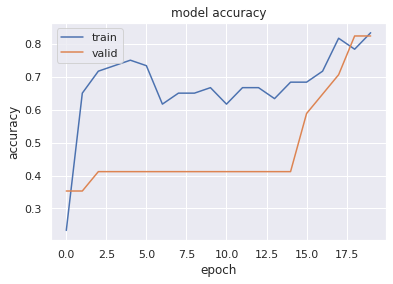

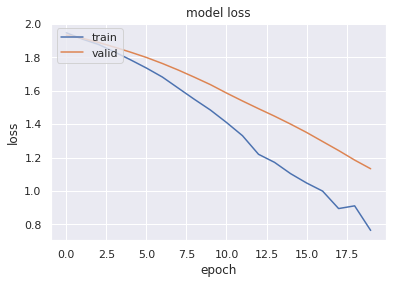

In [11]:
# Podsumowanie historii dokładności
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# Podsumowanie historii błędu
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

Zbieżność: Po około 80 epokach widać, że dokładność wygląda jakby miała się stablizować na jednym poziomie, więc prawdopodobnie model osiągnął zbieżność bliską maksymalnej dokładności. Błąd maleje przez wszystkie epoki, stopniowo wypłaszczając wykres, co sugeruje zbliżenie się do minimalnej wartości (błędu).

Złożoność: mało złożona sieć - posiada tylko jedna warstwa ukrytą z 15 neuronami, które używają funkcji relu. Wyjście to 7 neuronów, które używają fukcji - softmax, ale to tylko 7 neuronów, więc całościowo nie komplikuje to bardzo budowy sieci. 
Aktualizacja wag występuje co 35 próbek danych w trakcie trwania każdej z 20 epok.

# DOSTRAJANIE PARAMETRÓW

Sztuczne Sieci Neuronowe mają wiele różnych miejsc do eksperymentowania. Struktura Sieci Neuronowej może być zmieniona i ma znaczący wpływ na wydajność. Ukryte warstwy mogą być dodawane lub usuwane i wiele różnych wartości może być wprowadzonych. Można również zmienić parametry treningu, takie jak liczba epok, rozmiar partii i inne dane wejściowe, aby zobaczyć, co przynosi najlepszą dokładność.  

Dostrajanie zarówno parametrów strukturalnych, jak i treningowych jest niezbędnym krokiem w tworzeniu rozwiązania opartego na sieci neuronowej dla dowolnego problemu.

Podczas gdy ta zmienność parametrów sprawia, że ANN może być dostrojona do wysokiego stopnia perfekcji, znalezienie tych samych wzorców, które ANN rozpoznaje i zrozumienie jej wyborów jest trudne dla ludzi.

---
Eksperyment:
Dodanie drugiej ukrytej warstwy i sprawdzenie, czy poprawia to dokładność.

In [12]:
import keras
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 

# Inicjalizacja ANN
model2 = Sequential()

# Dodanie warstwy wejściowej i pierwszej warstwy ukrytej
model2.add(Dense(1000,input_dim=15,activation='relu'))
# Zmiana liczby węzłów w pierwszej warstwie ukrytej
model2.add(Dense(100,activation='relu'))

# Dodanie drugiej wrstwy ukrytej
model2.add(Dense(300,activation='relu'))
# Ochrona przed przeuczeniem
model2.add(Dropout(0.2))

# Dodanie warstwy wyjściowej
model2.add(Dense(7,activation='softmax'))

# Kompilacja ANN
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Dopasowanie ANN do zbioru treningowego
history2=model2.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=35,epochs=20,verbose=1)

Epoch 1/20
2/2 [==============================] - 0s 115ms/step - loss: 1.9420 - accuracy: 0.1667 - val_loss: 1.9161 - val_accuracy: 0.4167
Epoch 2/20
2/2 [==============================] - 0s 19ms/step - loss: 1.9004 - accuracy: 0.4333 - val_loss: 1.8767 - val_accuracy: 0.4167
Epoch 3/20
2/2 [==============================] - 0s 22ms/step - loss: 1.8533 - accuracy: 0.4333 - val_loss: 1.8236 - val_accuracy: 0.4167
Epoch 4/20
2/2 [==============================] - 0s 20ms/step - loss: 1.7911 - accuracy: 0.4333 - val_loss: 1.7544 - val_accuracy: 0.4167
Epoch 5/20
2/2 [==============================] - 0s 21ms/step - loss: 1.6933 - accuracy: 0.4500 - val_loss: 1.6686 - val_accuracy: 0.4167
Epoch 6/20
2/2 [==============================] - 0s 20ms/step - loss: 1.5916 - accuracy: 0.4333 - val_loss: 1.5647 - val_accuracy: 0.4167
Epoch 7/20
2/2 [==============================] - 0s 19ms/step - loss: 1.4635 - accuracy: 0.4500 - val_loss: 1.4513 - val_accuracy: 0.4167
Epoch 8/20
2/2 [==========

## WYNIKI DLA ZBIORU TESTOWEGO


In [13]:
prediction2=model2.predict(X_test)
length2=len(prediction2)
y_label2=np.argmax(y_test,axis=1)
predict_label2=np.argmax(prediction2,axis=1)
#dokładność=jak wiele razy pasowało/jak wiele przypadków testowych
accuracy2=np.sum(y_label2==predict_label2)/length2 * 100 
print("Dokładność dla zbioru danych: ",accuracy2 )

1/1 [==============================] - 0s 40ms/step
Dokładność dla zbioru danych:  83.33333333333334


## ZŁOŻONOŚĆ I ZBIEŻNOŚĆ


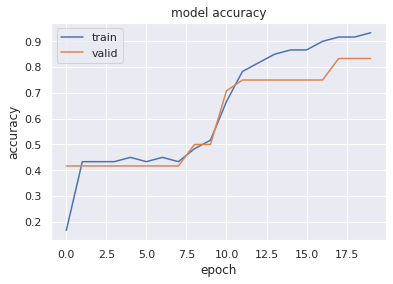

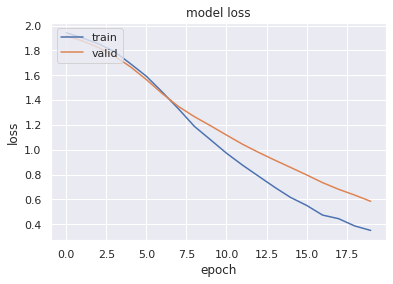

In [14]:
# Podsumowanie historii dokładności
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# Podsumowanie historii błędu
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

Uruchamiając kilkukrotnie środowisko wykonawcze, na podstawie zebranych wyników dla zbiorów testowych przed i po dostrojeniu parametrów, stwierdzono, że w większości uruchomień dodanie kolejnej warstwy ukrytej skutuje poprawą dokładności dla zbioru danych.